### Initial setup
**1. Imports packages**

**2. Load data**

**3. Observe essential data information**

**4. Change `Transported` to a numeric feature**

**5. Create features from `Cabin` (`Deck`, `Num`, `Side`)**

**6. Create features from `PassengerId` (`GroupID`, `PersonID`)**

**7. Create `TotalSpend` feature by adding all spending features**

**8. Set `PassengerId` as index**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

In [3]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<Axes: xlabel='Transported'>

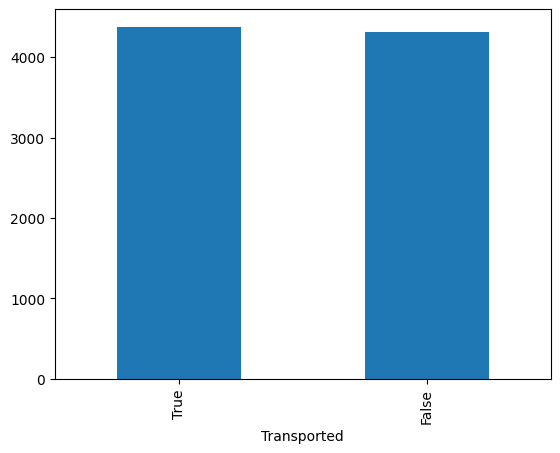

In [7]:
df_train["Transported"].value_counts().plot(kind="bar")

# Transported, True = False (roughly equal)

In [8]:
# Change "Transported" to a numeric feature
df_train["Transported"] = df_train["Transported"].apply(lambda x:int(x))

# Create features from "Cabin"
df_train[["Deck", "Num", "Side"]] = df_train["Cabin"].str.split("/", expand = True)
df_test[["Deck", "Num", "Side"]] = df_test["Cabin"].str.split("/", expand = True)

# Create features from "PassengerId"
df_train[["Group_ID", "Person_ID"]] = df_train["PassengerId"].str.split("_", expand = True)
df_test[["Group_ID", "Person_ID"]] = df_test["PassengerId"].str.split("_", expand = True)

# create "TotalSpend" by adding all spending features
df_train["TotalSpend"] = df_train[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1, skipna=True, min_count=1)
df_test["TotalSpend"] = df_test[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1, skipna=True, min_count=1)

# set "PassengerId" as index
df_train = df_train.set_index('PassengerId')
df_test = df_test.set_index('PassengerId')

In [9]:
print("Deck：", len(df_train["Deck"].unique()))
print("Num：", len(df_train["Num"].unique()))
print("HomePlanet：", len(df_train["HomePlanet"].unique()))
print("Destination：", len(df_train["Destination"].unique()))
print("Group_ID：", len(df_train["Group_ID"].unique()))

Deck： 9
Num： 1818
HomePlanet： 4
Destination： 4
Group_ID： 6217


### Analyze the relationship between `GroupID` and other features and fillna

**1. Check if groups share the same features**
- `Side` and `HomePlanet` are the same within the same group
- `VIP` are mostly the same within the same group


**2. Fill missing values with the same group**
- fill in `Side` and `HomePlanet`

In [10]:
# Check if groups share the same features

train_analysis = df_train[["CryoSleep", "VIP" ,"Group_ID", "Deck", "Num", "HomePlanet", "Destination","Side"]].dropna()
groups = train_analysis["Group_ID"].unique()

HomePlanetDiffer = 0
DestinationDiffer = 0
NumDiffer = 0
DeckDiffer = 0
SideDiffer = 0
VIPDiffer = 0
CryoSleepDiffer = 0

for group in groups:
    subset = train_analysis[train_analysis["Group_ID"] == group]
    if len(subset["HomePlanet"].unique()) > 1:
        HomePlanetDiffer += 1

    if len(subset["Destination"].unique()) > 1:
        DestinationDiffer += 1

    if len(subset["Num"].unique()) > 1:
        NumDiffer += 1

    if len(subset["Deck"].unique()) > 1:
        DeckDiffer += 1

    if len(subset["Side"].unique()) > 1:
        SideDiffer += 1

    if len(subset["VIP"].unique()) > 1:
        VIPDiffer += 1
 
    if len(subset["CryoSleep"].unique()) > 1:
        CryoSleepDiffer += 1
        
print(f"HomePlanet not same:{HomePlanetDiffer}")
print(f"Destination not same:{DestinationDiffer}")
print(f"Num not same:{NumDiffer}")
print(f"Deck not same:{DeckDiffer}")
print(f"Side not same:{SideDiffer}")
print(f"VIP not same:{VIPDiffer}")
print(f"CryoSleep not same:{CryoSleepDiffer}")

# all groups share the same "HomePlanet" and "Side"
# most groups share the same "VIP" value

HomePlanet not same:0
Destination not same:628
Num not same:355
Deck not same:356
Side not same:0
VIP not same:94
CryoSleep not same:716


In [11]:
# fill missing values in "HomePlanet" and "Side" by groups

df_train["HomePlanet"] = df_train["HomePlanet"].fillna(df_train.groupby("Group_ID")["HomePlanet"].transform("first"))
df_test["HomePlanet"] = df_test["HomePlanet"].fillna(df_test.groupby("Group_ID")["HomePlanet"].transform("first"))

df_train["Side"] = df_train["Side"].fillna(df_train.groupby("Group_ID")["Side"].transform("first"))
df_test["Side"] = df_test["Side"].fillna(df_test.groupby("Group_ID")["Side"].transform("first"))

### Analyze `Destination`&`HomePlanet` and fillna
**1. Visualize data with plots to identify relationships**
- visualize by countplot
- set `x="Destination", hue=other features`
- set `x="HomePlanet", hue=other features`

**2. Filling some missing values by examination from plots**
- strong correlation between `HomePlanet` and `Deck`
- deck G only from Earth
- deck B, A, C, T only from Europa
- deck D only from Europa and Mars
- deck F only from Earth and Mars
- Earth has no VIP
- `Side` is mostly half and half

**3. Analyze correlations with p-value and Cramér's V**
- Lower p-value indicates higher correlation.
- Higher Cramér's V indicates stronger correlation.
- high correlation between `Destination` and `HomePlanet`
- high correlation between `HomePlanet` and `Deck`

**4. Fill missing values in `Destination` and `HomePlanet` based on p-value and Cramér's V analysis**
- Fill missing `Destination` values based on the distribution within each `HomePlanet`
- Fill missing `HomePlanet` values based on the distribution within each `Deck`

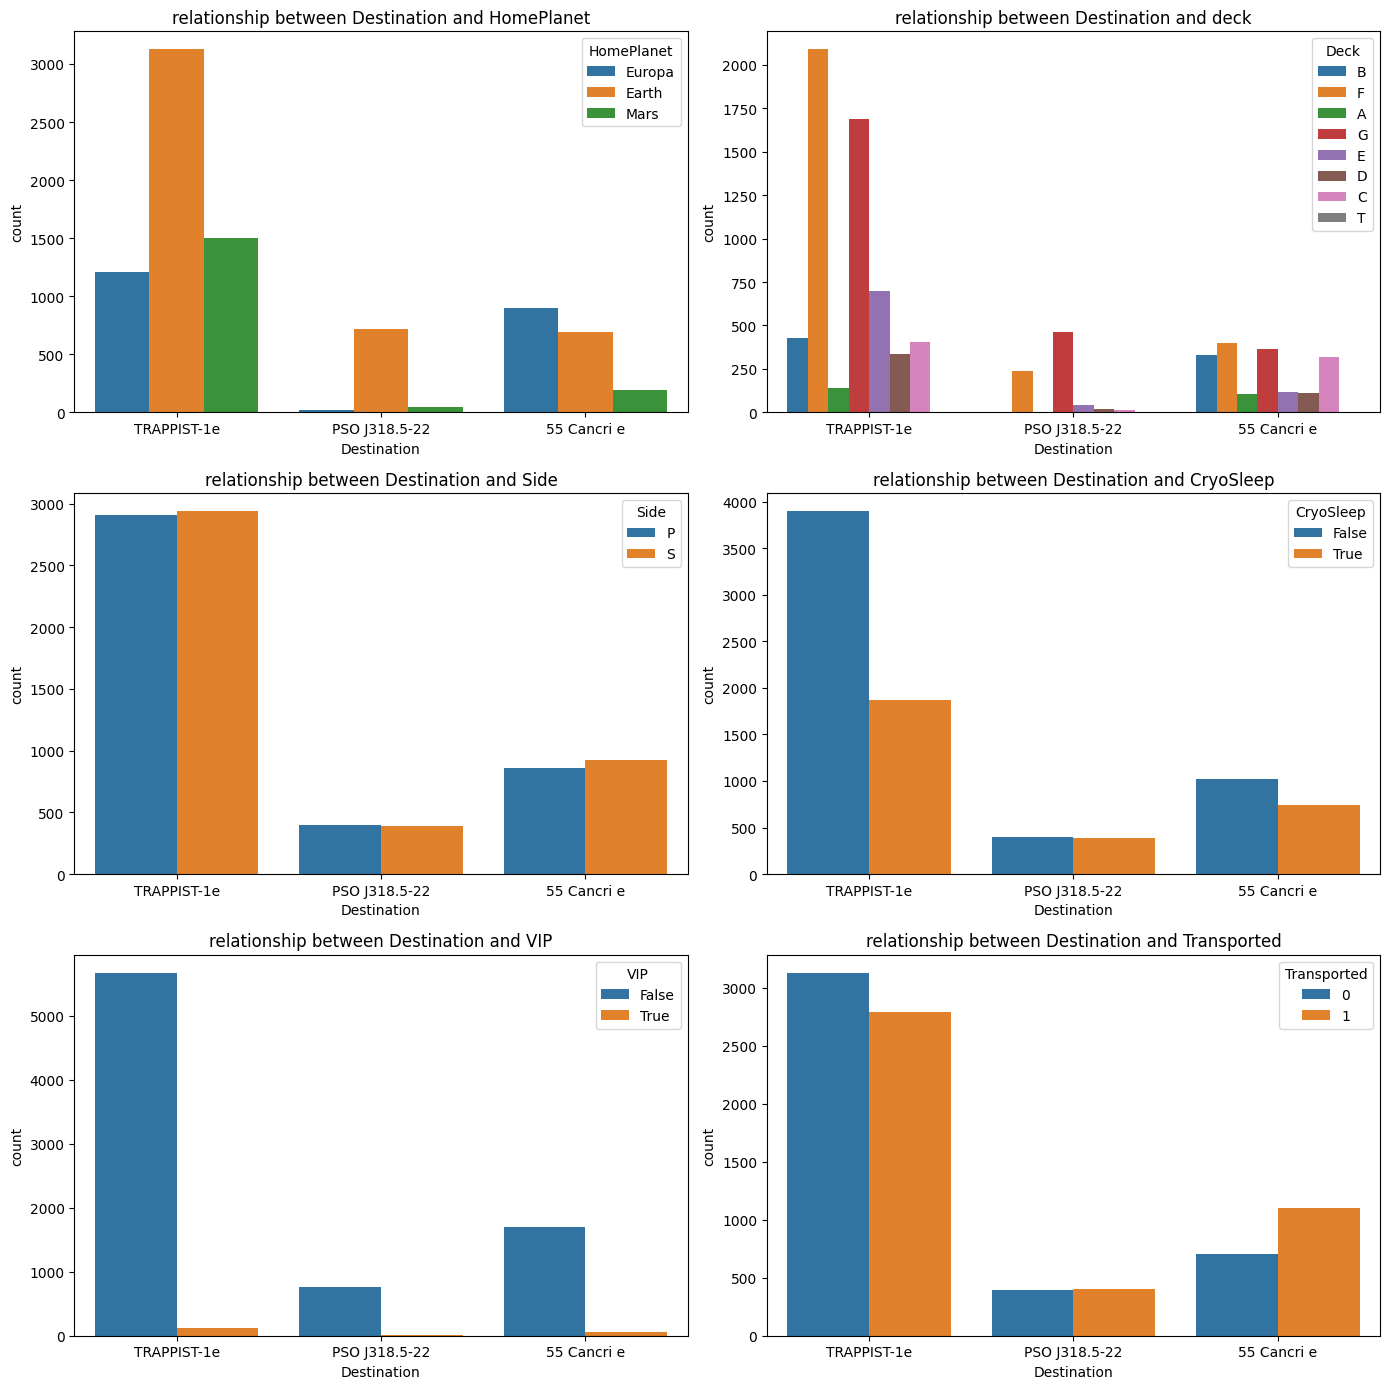

In [12]:
# relationship between "Destination" and other features

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6))= plt.subplots(3,2, figsize=(14, 14))
sns.countplot(data=df_train, x="Destination", hue="HomePlanet", ax=ax1)
ax1.set_title("relationship between Destination and HomePlanet")

sns.countplot(data=df_train, x="Destination", hue="Deck", ax=ax2)
ax2.set_title("relationship between Destination and deck")

sns.countplot(data=df_train, x="Destination", hue="Side", ax=ax3)
ax3.set_title("relationship between Destination and Side")

sns.countplot(data=df_train, x="Destination", hue="CryoSleep", ax=ax4)
ax4.set_title("relationship between Destination and CryoSleep")

sns.countplot(data=df_train, x="Destination", hue="VIP", ax=ax5)
ax5.set_title("relationship between Destination and VIP")

sns.countplot(data=df_train, x="Destination", hue="Transported", ax=ax6)
ax6.set_title("relationship between Destination and Transported")

plt.tight_layout()

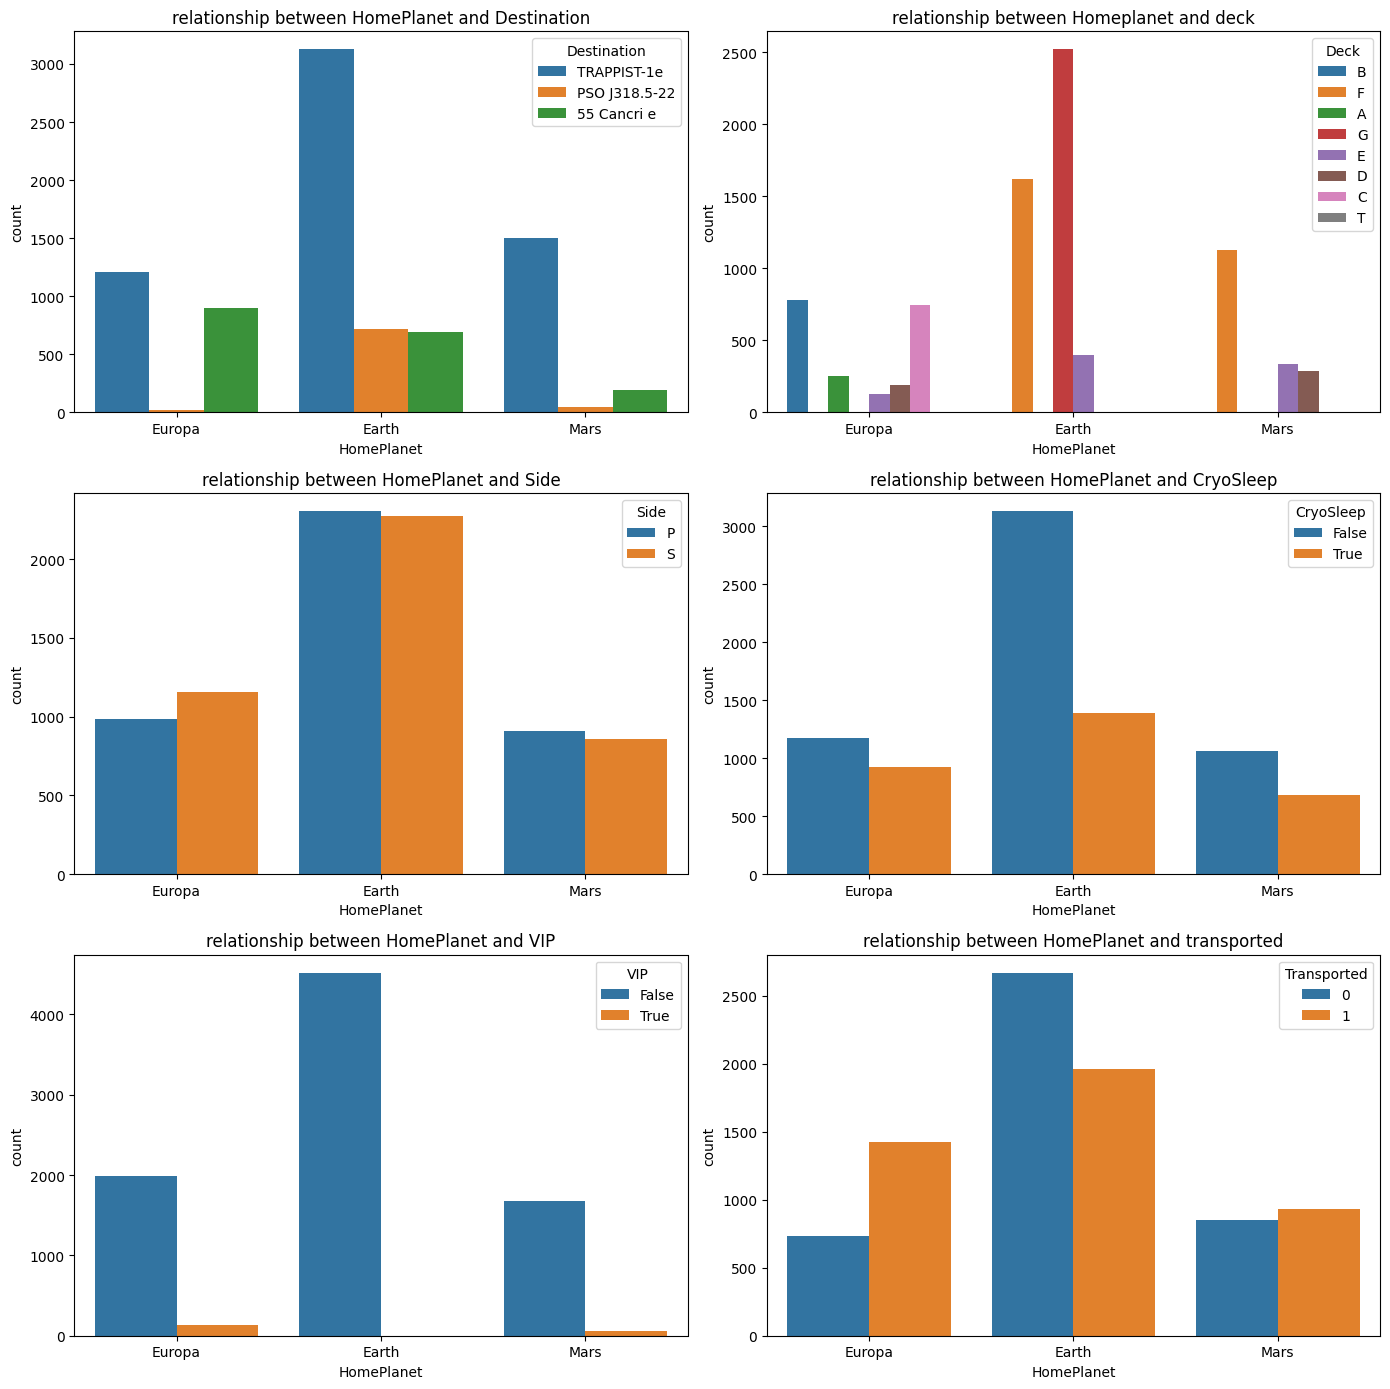

In [13]:
# relationship between "HomePlanet" and other features

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6))= plt.subplots(3, 2, figsize=(14, 14))

sns.countplot(data=df_train, x="HomePlanet", hue="Destination", ax=ax1)
ax1.set_title("relationship between HomePlanet and Destination")

sns.countplot(data=df_train, x="HomePlanet", hue="Deck", ax=ax2)
ax2.set_title("relationship between Homeplanet and deck")

sns.countplot(data=df_train, x="HomePlanet", hue="Side", ax=ax3)
ax3.set_title("relationship between HomePlanet and Side")

sns.countplot(data=df_train, x="HomePlanet", hue="CryoSleep", ax=ax4)
ax4.set_title("relationship between HomePlanet and CryoSleep")

sns.countplot(data=df_train, x="HomePlanet", hue="VIP", ax=ax5)
ax5.set_title("relationship between HomePlanet and VIP")

sns.countplot(data=df_train, x="HomePlanet", hue="Transported", ax=ax6)
ax6.set_title("relationship between HomePlanet and transported")

plt.tight_layout()

In [14]:
# Fill missing values by examination

df_train.loc[((df_train["Deck"] == "C")| (df_train["Deck"] == "A")| (df_train["Deck"] == "B")| (df_train["Deck"] == "T"))
            & (df_train["HomePlanet"].isna()), "HomePlanet"] = "Europa"
df_train.loc[(df_train["Deck"] == "G") & (df_train["HomePlanet"].isna()), "HomePlanet"] = "Earth"
df_train.loc[(df_train["Deck"] == "T") & (df_train["Destination"].isna()), "Destination"] = "TRAPPIST-1e"
df_train.loc[(df_train["HomePlanet"] == "Earth") & (df_train["VIP"].isna()), "VIP"] = False

df_test.loc[((df_test["Deck"] == "C")| (df_test["Deck"] == "A")| (df_test["Deck"] == "B")| (df_test["Deck"] == "T")) 
            & (df_test["HomePlanet"].isna()), "HomePlanet"] = "Europa"
df_test.loc[(df_test["Deck"] == "G") & (df_test["HomePlanet"].isna()), "HomePlanet"] = "Earth"
df_test.loc[(df_test["Deck"] == "T") & (df_test["Destination"].isna()), "Destination"] = "TRAPPIST-1e"
df_test.loc[(df_test["HomePlanet"] == "Earth") & (df_test["VIP"].isna()), "VIP"] = False

In [15]:
# Analyze correlations between "Destination" and other features by p-value and cramer's V

from scipy.stats import chi2_contingency

def destination_correlation(df, col):
    contingency_table = pd.crosstab(df["Destination"], df[col])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    cramers = np.sqrt(phi2 / min(r-1, k-1))
    
    return [p_value, cramers]

df_train_dropna = df_train.dropna()
df_test_dropna = df_test.dropna()

columns = ["HomePlanet", "Deck", "CryoSleep"]

for col in columns:
    corr = destination_correlation(df_train_dropna, col)
    print(f"Destination&{col}_train: p-value is {corr[0]},cramers is {corr[1]}")

    corr = destination_correlation(df_test_dropna, col)
    print(f"Destination&{col}_test: p-value is {corr[0]},cramers is {corr[1]}")

Destination&HomePlanet_train: p-value is 7.671250103332346e-199,cramers is 0.26045711886127415
Destination&HomePlanet_test: p-value is 2.332872327959781e-110,cramers is 0.2774710284391876
Destination&Deck_train: p-value is 9.889124682669309e-175,cramers is 0.2513310668062237
Destination&Deck_test: p-value is 3.70989783266343e-99,cramers is 0.2749335495948287
Destination&CryoSleep_train: p-value is 2.8051199039335115e-23,cramers is 0.12344767395037017
Destination&CryoSleep_test: p-value is 4.785221976789843e-13,cramers is 0.13011959651478697


In [16]:
# Analyze correlations between "HomePlanet" and other features by p-value and cramer's V

def homeplanet_correlation(df, col):
    contingency_table = pd.crosstab(df["HomePlanet"], df[col])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    cramers = np.sqrt(phi2 / min(r-1, k-1))
    
    return [p_value, cramers]

columns = ["Destination", "Deck", "CryoSleep"]

for col in columns:
    corr = homeplanet_correlation(df_train_dropna, col)
    print(f"HomePlanet&{col}_train: p-value is {corr[0]},cramers is {corr[1]}")

    corr = homeplanet_correlation(df_test_dropna, col)
    print(f"HomePlanet&{col}_test: p-value is {corr[0]},cramers is {corr[1]}")

HomePlanet&Destination_train: p-value is 7.671250103332346e-199,cramers is 0.26045711886127415
HomePlanet&Destination_test: p-value is 2.332872327959781e-110,cramers is 0.2774710284391876
HomePlanet&Deck_train: p-value is 0.0,cramers is 0.7548083518791102
HomePlanet&Deck_test: p-value is 0.0,cramers is 0.742562424934277
HomePlanet&CryoSleep_train: p-value is 9.739474322085245e-20,cramers is 0.11334378160698454
HomePlanet&CryoSleep_test: p-value is 7.214171812841382e-14,cramers is 0.13438886263363042


In [17]:
# Fill missing "Destination" values based on the distribution within each "HomePlanet"

np.random.seed(42)

def fillna_destination(df, home):
    df_homeDest_counts = df[df["HomePlanet"] == home]["Destination"].value_counts(normalize=True)
    
    if df_homeDest_counts.empty:
        dest_counts = df["Destination"].value_counts(normalize=True)
        df.loc[(df["HomePlanet"] == home) & (df["Destination"].isna()), "Destination"] = np.random.choice(
            dest_counts.index,
            size=df[(df["HomePlanet"] == home) & (df["Destination"].isna())].shape[0],
            p=dest_counts.values
        )

    elif len(df_homeDest_counts) > 1:
        df.loc[(df["HomePlanet"] == home) & (df["Destination"].isna()), "Destination"] = np.random.choice(
            df_homeDest_counts.index,
            size=df[(df["HomePlanet"] == home) & (df["Destination"].isna())].shape[0],
            p=df_homeDest_counts.values
        )

    else:
        df.loc[(df["HomePlanet"] == home) & (df["Destination"].isna()), "Destination"] = df_homeDest_counts.index[0]
    return df

for home in df_train["HomePlanet"].unique():
    df_train = fillna_destination(df_train, home)
    df_test = fillna_destination(df_test, home)

In [18]:
# Fill missing "HomePlanet" values based on the distribution within each "Deck"

np.random.seed(42)

def fillna_homeplanet(df, deck):
    df_deckHome_counts = df[df["Deck"] == deck]["HomePlanet"].value_counts(normalize=True)
    
    if df_deckHome_counts.empty:
        home_counts = df["HomePlanet"].value_counts(normalize=True)
        df.loc[(df["Deck"] == deck) & (df["HomePlanet"].isna()), "HomePlanet"] = np.random.choice(
            home_counts.index,
            size=df[(df["Deck"] == deck) & (df["HomePlanet"].isna())].shape[0],
            p=home_counts.values
        )

    elif len(df_deckHome_counts) > 1:
        df.loc[(df["Deck"] == deck) & (df["HomePlanet"].isna()), "HomePlanet"] = np.random.choice(
            df_deckHome_counts.index,
            size=df[(df["Deck"] == deck) & (df["HomePlanet"].isna())].shape[0],
            p=df_deckHome_counts.values
        )

    else:
        df.loc[(df["Deck"] == deck) & (df["HomePlanet"].isna()), "HomePlanet"] = df_deckHome_counts.index[0]
    return df

for deck in df_train["Deck"].unique():
    df_train = fillna_homeplanet(df_train, deck)
    df_test = fillna_homeplanet(df_test, deck)

In [19]:
# Fill missing values in "Side" based on its distribution

np.random.seed(42)
df_train_side_counts = df_train["Side"].value_counts(normalize=True)
df_train["Side"] = df_train["Side"].apply(
    lambda x: np.random.choice(df_train_side_counts.index, p=df_train_side_counts.values) if pd.isna(x) else x
)

df_test_side_counts = df_test["Side"].value_counts(normalize=True)
df_test["Side"] = df_test["Side"].apply(
    lambda x: np.random.choice(df_test_side_counts.index, p=df_test_side_counts.values) if pd.isna(x) else x
)

In [20]:
df_train.isnull().sum()

HomePlanet        4
CryoSleep       217
Cabin           199
Destination       1
Age             179
VIP              87
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Deck            199
Num             199
Side              0
Group_ID          0
Person_ID         0
TotalSpend        0
dtype: int64

### Analyze spending features and fillna

**1. Observe that `CryoSleep=True` have no spending**

**2. Observe that passengers under 13 have no spending**

**3. Fill missing values in spending features with 0 for `CryoSleep=True` or `Age` under 13**

**4. Set `CryoSleep` to True for passengers over 13 with zero spending**

**5. Fill missing values in `Age`**
- for passengers are under 13(zero spending and not in `CryoSleep`): fill missing values in `Age` with median
- for other passengers: fill missing values in `Age` with median

In [21]:
# cryoSleep passengers have no spending

print(df_train[df_train["CryoSleep"] == True]["TotalSpend"].sum(skipna=True))
print(df_test[df_test["CryoSleep"] == True]["TotalSpend"].sum(skipna=True))

0.0
0.0


In [22]:
# passengers under 13 have no spending

print(df_train[df_train["Age"] < 13]["TotalSpend"].sum(skipna=True))
print(df_test[df_test["Age"] < 13]["TotalSpend"].sum(skipna=True))

print(df_train[df_train["Age"] < 14]["TotalSpend"].sum(skipna=True))
print(df_test[df_test["Age"] < 14]["TotalSpend"].sum(skipna=True))

0.0
0.0
157258.0
59669.0


In [23]:
# no special patterns

print(df_train[df_train["VIP"] == True]["RoomService"].mean(skipna=True))
print(df_train[df_train["VIP"] == True]["FoodCourt"].mean(skipna=True))
print(df_train[df_train["VIP"] == True]["ShoppingMall"].mean(skipna=True))
print(df_train[df_train["VIP"] == True]["Spa"].mean(skipna=True))
print(df_train[df_train["VIP"] == True]["VRDeck"].mean(skipna=True))

473.61538461538464
1811.3937823834196
247.72680412371133
760.7106598984772
1234.8564102564103


In [24]:
# fill missing values in spending features with 0 for CryoSleep passengers or age under 13

def age_under13_spend(df, col):
    df.loc[((df["CryoSleep"] == True) | (df["Age"] < 13)) & (df[col].isna()), col] = 0
    return df

spend_col = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "TotalSpend"]
for col in spend_col:
    df_train = age_under13_spend(df_train, col)
    df_test = age_under13_spend(df_test, col)

In [25]:
# most passengers over 13 with no spending are in CryoSleep

print(len((df_train[(df_train["Age"]>=13) & (df_train["TotalSpend"]==0) & (df_train["CryoSleep"] == True)])))
print(len((df_train[(df_train["Age"]>=13) & (df_train["TotalSpend"]==0) & (df_train["CryoSleep"] == False)])))

2578
105


In [26]:
# set "CryoSleep" to True for passengers over 13 with zero spending

df_train.loc[(df_train["Age"] >= 13) & 
             (df_train["TotalSpend"] == 0) & 
             (df_train["CryoSleep"].isna()), "CryoSleep"] = df_train["CryoSleep"].mode()[0]

df_test.loc[(df_test["Age"] >= 13) & 
             (df_test["TotalSpend"] == 0) & 
             (df_test["CryoSleep"].isna()), "CryoSleep"] = df_test["CryoSleep"].mode()[0]

In [27]:
# Fill missing values in "Age" with median for passengers with zero spending and not in CryoSleep
# these passengers are under 13

train_median_age = df_train.loc[(df_train["TotalSpend"] == 0) & 
    (df_train["CryoSleep"] == False) & (df_train["Age"].notna()), "Age"].median()
df_train.loc[(df_train["TotalSpend"] == 0) & (df_train["CryoSleep"] == False) & 
    (df_train["Age"].isna()), "Age"] = train_median_age

test_median_age = df_test.loc[(df_test["TotalSpend"] == 0) & 
    (df_test["CryoSleep"] == False) & (df_test["Age"].notna()), "Age"].median()
df_test.loc[(df_test["TotalSpend"] == 0) & (df_test["CryoSleep"] == False) & 
    (df_test["Age"].isna()), "Age"] = test_median_age


# other "Age" values fill by median of all ages

df_train["Age"] = df_train["Age"].fillna(df_train["Age"].median())
df_test["Age"] = df_test["Age"].fillna(df_test["Age"].median())

In [28]:
df_train.isnull().sum()

HomePlanet        4
CryoSleep       142
Cabin           199
Destination       1
Age               0
VIP              87
RoomService     107
FoodCourt       106
ShoppingMall    103
Spa             114
VRDeck          107
Name            200
Transported       0
Deck            199
Num             199
Side              0
Group_ID          0
Person_ID         0
TotalSpend        0
dtype: int64

### Analyze `CryoSleep` and fillna

**1. Visualize proportion of `CryoSleep` in each deck**
- visualize by barplot
- strong correlation between `CryoSleep` and `Deck`

**2. Fill missing values in `CryoSleep` based on the distribution within each deck**

Text(0.5, 1.0, 'test-Proportion of CryoSleep in each deck')

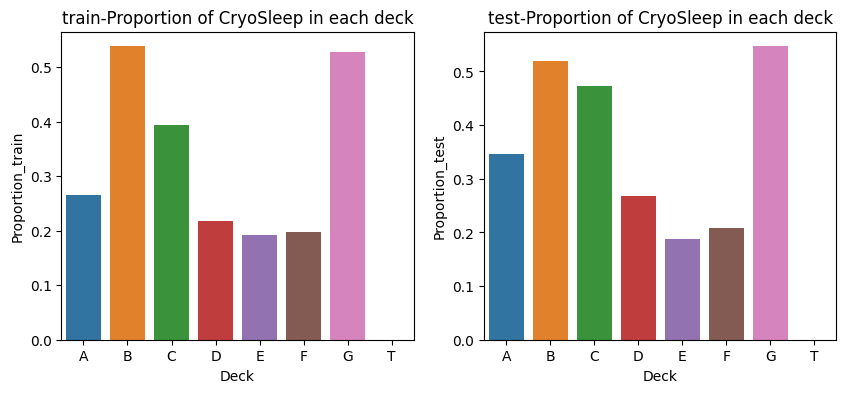

In [29]:
# Visualize proportion of CryoSleep in each deck

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
cryo_train = df_train.groupby("Deck")["CryoSleep"].apply(lambda x: (x == True).mean()).reset_index(name="Proportion_train")
cryo_test = df_test.groupby("Deck")["CryoSleep"].apply(lambda x: (x == True).mean()).reset_index(name="Proportion_test")

sns.barplot(data=cryo_train, x="Deck", y="Proportion_train", ax=ax1)
ax1.set_title("train-Proportion of CryoSleep in each deck")

sns.barplot(data=cryo_test, x="Deck", y="Proportion_test", ax=ax2)
ax2.set_title("test-Proportion of CryoSleep in each deck")

In [30]:
# Fill missing values in "CryoSleep" based on the distribution within each "Deck"

np.random.seed(42)

def fillna_cryo(df, deck):
    df_deckCryo_counts = df[df["Deck"] == deck]["CryoSleep"].value_counts(normalize=True)
    
    if df_deckCryo_counts.empty:
        cryo_counts = df["CryoSleep"].value_counts(normalize=True)
        df.loc[(df["Deck"] == deck) & (df["CryoSleep"].isna()), "CryoSleep"] = np.random.choice(
            cryo_counts.index,
            size=df[(df["Deck"] == deck) & (df["CryoSleep"].isna())].shape[0],
            p=cryo_counts.values
        )

    elif len(df_deckCryo_counts) > 1:
        df.loc[(df["Deck"] == deck) & (df["CryoSleep"].isna()), "CryoSleep"] = np.random.choice(
            df_deckCryo_counts.index,
            size=df[(df["Deck"] == deck) & (df["CryoSleep"].isna())].shape[0],
            p=df_deckCryo_counts.values
        )

    else:
        df.loc[(df["Deck"] == deck) & (df["CryoSleep"].isna()), "CryoSleep"] = df_deckCryo_counts.index[0]
    return df

for deck in df_train["Deck"].unique():
    df_train = fillna_cryo(df_train, deck)
    df_test = fillna_cryo(df_test, deck)

### Analyze `VIP` and fillna

**1. Observe that no VIP under 13**

**2. Visualize proportion of `VIP` in each deck**
- visualize by barplot
- strong correlation between `VIP` and `Deck`

**3. Fill missing values in `VIP`**
- `"VIP"=False` for age under 13
- fill missing values in `VIP` by groups (by previous examination)
- fill other missing values in "VIP" based on the distribution within each deck

In [31]:
# no VIP under 13

print(len(df_train[(df_train["Age"] < 13) & (df_train["VIP"] == True)]))
print(len(df_test[(df_test["Age"] < 13) & (df_test["VIP"] == True)]))

0
0


Text(0.5, 1.0, 'test-Proportion of VIP in each deck')

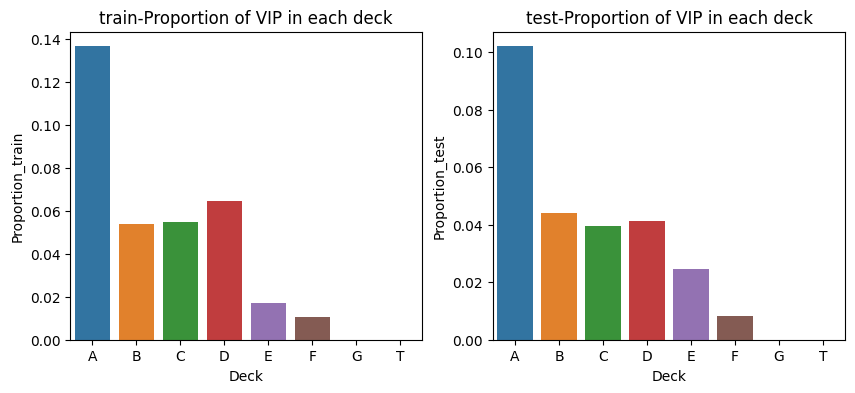

In [32]:
# Visualize proportion of VIP in each deck

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
vip_train = df_train.groupby("Deck")["VIP"].apply(lambda x: (x == True).mean()).reset_index(name="Proportion_train")
vip_test = df_test.groupby("Deck")["VIP"].apply(lambda x: (x == True).mean()).reset_index(name="Proportion_test")

sns.barplot(data=vip_train, x="Deck", y="Proportion_train", ax=ax1)
ax1.set_title("train-Proportion of VIP in each deck")

sns.barplot(data=vip_test, x="Deck", y="Proportion_test", ax=ax2)
ax2.set_title("test-Proportion of VIP in each deck")

In [33]:
# Set "VIP" to False for passengers under 13 with missing values. 

df_train.loc[df_train["Age"] < 13 & df_train["VIP"].isna(), "VIP"] = False
df_test.loc[df_test["Age"] < 13 & df_test["VIP"].isna(), "VIP"] = False


# fill missing values in "VIP" by groups

df_train["VIP"] = df_train["VIP"].fillna(df_train.groupby("Group_ID")["VIP"].transform("first"))
df_test["VIP"] = df_test["VIP"].fillna(df_test.groupby("Group_ID")["VIP"].transform("first"))

In [34]:
# Fill missing values in "VIP" based on the distribution within each "Deck"

np.random.seed(42)

def fillna_VIP(df, deck):
    df_deckVIP_counts = df[df["Deck"] == deck]["VIP"].value_counts(normalize=True)
    
    if df_deckVIP_counts.empty:
        VIP_counts = df["VIP"].value_counts(normalize=True)
        df.loc[(df["Deck"] == deck) & (df["VIP"].isna()), "VIP"] = np.random.choice(
            VIP_counts.index,
            size=df[(df["Deck"] == deck) & (df["VIP"].isna())].shape[0],
            p=VIP_counts.values
        )

    elif len(df_deckVIP_counts) > 1:
        df.loc[(df["Deck"] == deck) & (df["VIP"].isna()), "VIP"] = np.random.choice(
            df_deckVIP_counts.index,
            size=df[(df["Deck"] == deck) & (df["VIP"].isna())].shape[0],
            p=df_deckVIP_counts.values
        )

    else:
        df.loc[(df["Deck"] == deck) & (df["VIP"].isna()), "VIP"] = df_deckVIP_counts.index[0]
    return df

for deck in df_train["Deck"].unique():
    df_train = fillna_VIP(df_train, deck)
    df_test = fillna_VIP(df_test, deck)

### Analyze "Deck" and fillna

**1. Visualize data with plots to identify relationships**
- visualize by countplot
- set `x="Deck", hue=other features`

**2. Fill missing values in `Deck` based on the distribution within each `HomePlanet`**
- strong correlaiton between `Deck` and `HomePlanet`

Text(0.5, 1.0, 'relationship between deck and Destination')

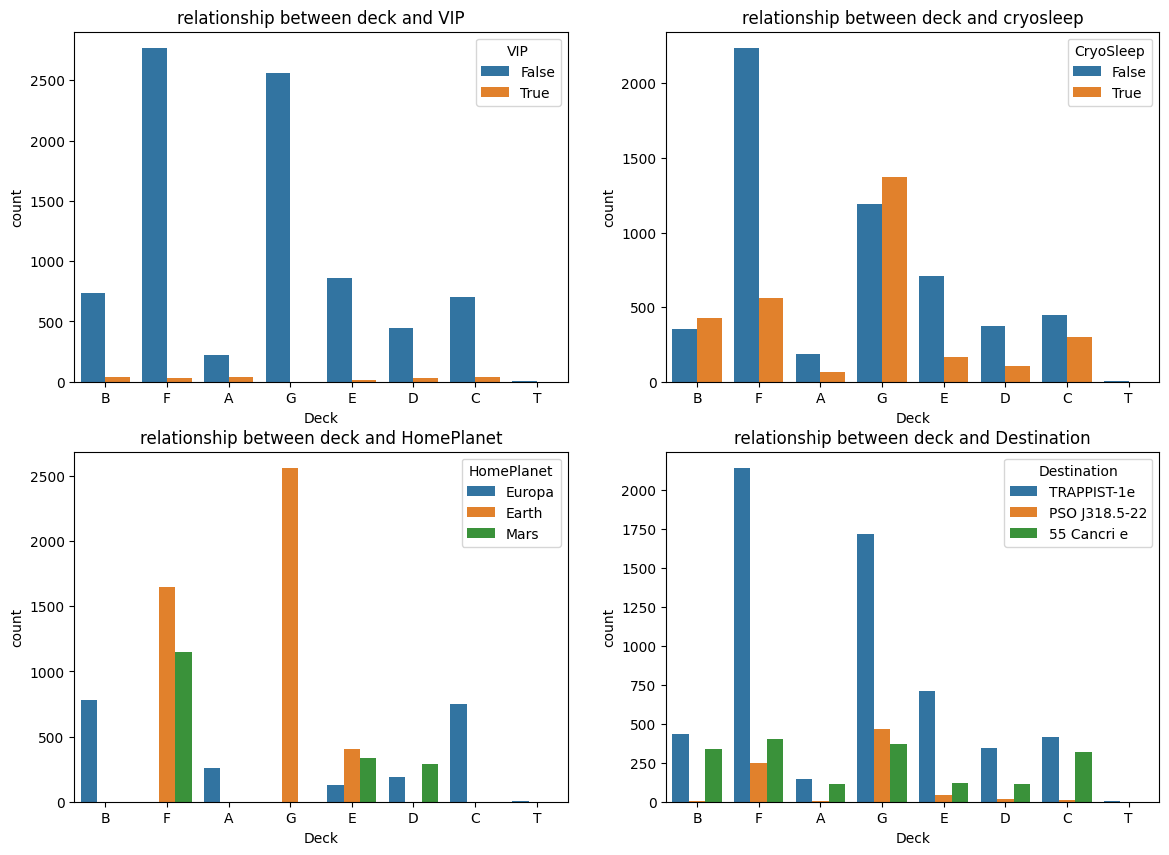

In [35]:
# relationship between "Deck" and other features

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2 ,figsize=(14, 10))

sns.countplot(data=df_train, x="Deck", hue="VIP", ax=ax1)
ax1.set_title("relationship between deck and VIP")

sns.countplot(data=df_train, x="Deck", hue="CryoSleep", ax=ax2)
ax2.set_title("relationship between deck and cryosleep")

sns.countplot(data=df_train, x="Deck", hue="HomePlanet", ax=ax3)
ax3.set_title("relationship between deck and HomePlanet")

sns.countplot(data=df_train, x="Deck", hue="Destination", ax=ax4)
ax4.set_title("relationship between deck and Destination")

In [36]:
# Fill missing values in "Deck" based on the distribution within each "HomePlanet"

np.random.seed(42)

def fillna_deck(df, home):
    df_homeDeck_counts = df[df["HomePlanet"] == home]["Deck"].value_counts(normalize=True)
    
    if df_homeDeck_counts.empty:
        deck_counts = df["Deck"].value_counts(normalize=True)
        df.loc[(df["HomePlanet"] == home) & (df["Deck"].isna()), "Deck"] = np.random.choice(
            deck_counts.index,
            size=df[(df["HomePlanet"] == home) & (df["Deck"].isna())].shape[0],
            p=deck_counts.values
        )

    elif len(df_homeDeck_counts) > 1:
        df.loc[(df["HomePlanet"] == home) & (df["Deck"].isna()), "Deck"] = np.random.choice(
            df_homeDeck_counts.index,
            size=df[(df["HomePlanet"] == home) & (df["Deck"].isna())].shape[0],
            p=df_homeDeck_counts.values
        )

    else:
        df.loc[(df["HomePlanet"] == home) & (df["Deck"].isna()), "Deck"] = df_homeDeck_counts.index[0]
    return df

for home in df_train["HomePlanet"].unique():
    df_train = fillna_deck(df_train, home)
    df_test = fillna_deck(df_test, home)

### Analyze spending features again and fillna

**1. Fill missing values in spending columns with median**

**2. Create boxplots to visualize the distribution of spending features**
- Observe that spending features have long tail

**3. Log-transform spending features to reduce skewness**

In [37]:
# Fill missing values in spending columns with median

spend_col = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "TotalSpend"]

df_train.fillna(df_train[spend_col].median(), inplace=True)
df_test.fillna(df_test[spend_col].median(), inplace=True)

Text(0.5, 1.0, 'test spending boxplot')

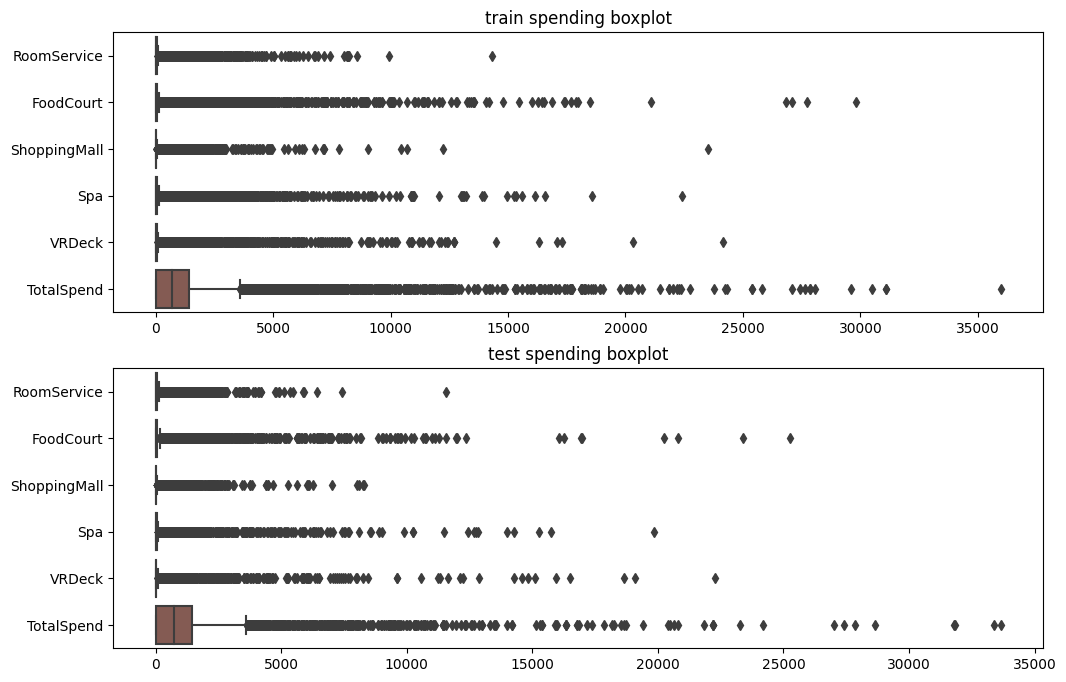

In [38]:
# Create boxplots to visualize the distribution of spending features

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

sns.boxplot(df_train[spend_col], orient="h", ax=ax1)
ax1.set_title("train spending boxplot")
sns.boxplot(df_test[spend_col], orient="h", ax=ax2)
ax2.set_title("test spending boxplot")

In [39]:
# Log-transform spending features to reduce skewness

df_train[spend_col] =  np.log1p(df_train[spend_col])
df_test[spend_col] =  np.log1p(df_test[spend_col])

In [40]:
df_train.isnull().sum()

HomePlanet        4
CryoSleep         6
Cabin           199
Destination       1
Age               0
VIP               1
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Deck              4
Num             199
Side              0
Group_ID          0
Person_ID         0
TotalSpend        0
dtype: int64

In [41]:
df_train.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Group_ID,Person_ID,TotalSpend
PassengerId,,,,,,,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,Maham Ofracculy,0,B,0,P,0001,01,0.000000
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,4.700480,2.302585,3.258097,6.309918,3.806662,Juanna Vines,1,F,0,S,0002,01,6.602588
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,3.784190,8.182280,0.000000,8.812248,3.912023,Altark Susent,0,A,0,S,0003,01,9.248021
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.000000,7.157735,5.918894,8.110728,5.267858,Solam Susent,0,A,0,S,0003,02,8.551981
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,5.717028,4.262680,5.023881,6.338594,1.098612,Willy Santantines,1,F,1,S,0004,01,6.995766


### Dropping

**1. Remove irrelevant columns (`Cabin`, `Name`, `Num`)**

**2. Drop rows with missing values**

In [42]:
# Remove irrelevant columns

drop_col = ["Cabin", "Name", "Num"]
df_train = df_train.drop(columns=drop_col)
df_test = df_test.drop(columns=drop_col)

In [43]:
# Drop rows with missing values

df_train.dropna(inplace=True)

df_test.fillna(df_test.median(numeric_only=True), inplace=True)
for col in df_test.select_dtypes(include="object"):
    df_test[col].fillna(df_test[col].mode()[0], inplace=True)


### Encoding

**1. Visualize proportion of `Deck` by `Transported`**
- strong correlation between `Deck` and `Transported`

**2. Perform ordinal encoding on `Deck` based on its `Transported` proportion**

**3. Perform one hot encoding on other object features**

**4. Convert object and bool features into numeric"**

Text(0.5, 1.0, 'Proportion of Transported in each deck')

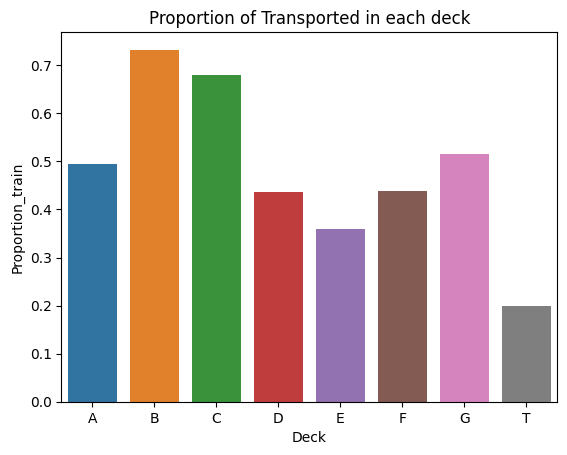

In [44]:
# Visualize proportion of Deck in by transported

trans_train = df_train.groupby("Deck")["Transported"].apply(lambda x: (x == True).mean()).reset_index(name="Proportion_train")

sns.barplot(data=trans_train, x="Deck", y="Proportion_train")
plt.title("Proportion of Transported in each deck")

In [45]:
# Perform ordinal encoding on "Deck" based on its "Transported" proportion

trans_train = trans_train.sort_values(by="Proportion_train", ascending=False)

deck_encoding_map = {deck: rank for rank, deck in enumerate(trans_train["Deck"], start=1)}
df_train["Deck"] = df_train["Deck"].map(deck_encoding_map)
df_test["Deck"] = df_test["Deck"].map(deck_encoding_map)

In [46]:
# Perform one hot encoding on other object features

df_train = pd.get_dummies(df_train, columns=["HomePlanet","Destination","CryoSleep","VIP","Side"])
df_test = pd.get_dummies(df_test, columns=["HomePlanet","Destination","CryoSleep","VIP","Side"])

In [47]:
# Convert object and bool features into numeric

for col in df_train.columns:
    if df_train[col].dtype == "object" or df_train[col].dtype == "bool":
        df_train[col] = df_train[col].astype(int)

for col in df_test.columns:
    if df_test[col].dtype == "object" or df_test[col].dtype == "bool":
        df_test[col] = df_test[col].astype(int)

In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8681 entries, 0001_01 to 9280_02
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8681 non-null   float64
 1   RoomService                8681 non-null   float64
 2   FoodCourt                  8681 non-null   float64
 3   ShoppingMall               8681 non-null   float64
 4   Spa                        8681 non-null   float64
 5   VRDeck                     8681 non-null   float64
 6   Transported                8681 non-null   int64  
 7   Deck                       8681 non-null   int64  
 8   Group_ID                   8681 non-null   int64  
 9   Person_ID                  8681 non-null   int64  
 10  TotalSpend                 8681 non-null   float64
 11  HomePlanet_Earth           8681 non-null   int64  
 12  HomePlanet_Europa          8681 non-null   int64  
 13  HomePlanet_Mars            8681 non-null   i

### Train model

**1. Split train data to train and validation data**

**2. Scale all numerical columns**
- prepare for logestic regression and mlp model

**3. Logestic regression**

**4. Random forest**

**5. CatBoost**

**6. Multi-Layer Perceptron (MLP)**

**7. XGBoost**

**8. Stacking**

*RandomizedSearch first, then GridSearch to find the optimal hyperparameters in every models*

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [50]:
# split
X, y = df_train.drop('Transported', axis=1), df_train['Transported']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_test = df_test

# scale all numerical columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#### Logestic Regression

In [51]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [52]:
# Logistic Regression Randomized Search (scaled data)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg_params = {'C': np.arange(0.01, 10, 0.5)}

log_reg_random = RandomizedSearchCV(log_reg, log_reg_params, cv=10, n_jobs=-1, verbose=1)
log_reg_random.fit(X_train_scaled, y_train)

print("Best hyperparameters: ", log_reg_random.best_params_)
print("Best mean cross-validation score: {:.3f}".format(log_reg_random.best_score_))

best_reg = log_reg_random.best_estimator_
y_pred = best_reg.predict(X_val_scaled)
print(f"random-Accuracy for best regression model: {accuracy_score(y_val, y_pred)}")

#Best hyperparameters:  {'C': 9.01}
#Best mean cross-validation score: 0.773
#random-Accuracy for best regression model: 0.7777777777777778

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best hyperparameters:  {'C': 9.01}
Best mean cross-validation score: 0.773
random-Accuracy for best regression model: 0.7777777777777778


In [53]:
# Logistic Regression Grid Search

log_reg_grid_params = {
    'C': np.arange(log_reg_random.best_params_['C']*0.8, log_reg_random.best_params_['C']*1.2, 0.1)
}

log_reg_grid = GridSearchCV(log_reg, log_reg_grid_params, cv=5, n_jobs=-1, verbose=1)
log_reg_grid.fit(X_train_scaled, y_train)

print("Best hyperparameters: ", log_reg_grid.best_params_)
print("Best mean cross-validation score: {:.3f}".format(log_reg_grid.best_score_))

best_reg = log_reg_grid.best_estimator_
y_pred = best_reg.predict(X_val_scaled)
print(f"grid-Accuracy for best regression model: {accuracy_score(y_val, y_pred)}")

#Best hyperparameters:  {'C': 7.208}
#Best mean cross-validation score: 0.773
#grid-Accuracy for best regression model: 0.7777777777777778

Fitting 5 folds for each of 37 candidates, totalling 185 fits
Best hyperparameters:  {'C': 7.208}
Best mean cross-validation score: 0.773
grid-Accuracy for best regression model: 0.7777777777777778


#### Random Forest

In [54]:
# Random Forest Randomized Search

from sklearn.ensemble import RandomForestClassifier

rf_params = {
    'n_estimators': np.arange(300, 1200, 50),
    'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(3, 20),
    'min_samples_leaf': np.arange(5, 20),
    'max_features': ['sqrt', 'log2', None]
}

rf_model = RandomForestClassifier(random_state=42)

rf_randomized = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_params,
    n_iter=10,
    cv=10,
    n_jobs=-1,
    verbose=1,
    random_state=42
)
rf_randomized.fit(X_train, y_train)

print("Best hyperparameters: ", rf_randomized.best_params_)
print("Best mean cross-validation score: {:.3f}".format(rf_randomized.best_score_))

best_rf = rf_randomized.best_estimator_
y_pred = best_rf.predict(X_val)
print(f"random-Accuracy for best RandomForest model: {accuracy_score(y_val, y_pred)}")

#Best hyperparameters:  {'n_estimators': 800, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_depth': 16}
#Best mean cross-validation score: 0.802
#random-Accuracy for best RandomForest model: 0.798503166378814

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best hyperparameters:  {'n_estimators': 800, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_depth': 16}
Best mean cross-validation score: 0.803
random-Accuracy for best RandomForest model: 0.7996545768566494


In [55]:
# Random Forest Grid Search

rf_grid_params = {
    'n_estimators': [rf_randomized.best_params_['n_estimators'] - 50, 
                     rf_randomized.best_params_['n_estimators'], 
                     rf_randomized.best_params_['n_estimators'] + 50],
    'max_depth': [rf_randomized.best_params_['max_depth'] - 2, 
                  rf_randomized.best_params_['max_depth'], 
                  rf_randomized.best_params_['max_depth'] + 2],
    'min_samples_split': [rf_randomized.best_params_['min_samples_split'] - 2, 
                          rf_randomized.best_params_['min_samples_split'], 
                          rf_randomized.best_params_['min_samples_split'] + 2]
}

rf_grid = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_grid_params,
    cv=5,
    n_jobs=-1,
    verbose=2
)
rf_grid.fit(X_train, y_train)

print("Best hyperparameters: ", rf_grid.best_params_)
print(f"Best Cross-Validation Score: {rf_grid.best_score_:.3f}")

best_rf = rf_grid.best_estimator_
y_pred = best_rf.predict(X_val)
print(f"grid-Accuracy for best RandomForest model: {accuracy_score(y_val, y_pred)}")

#Best hyperparameters:  {'max_depth': 16, 'min_samples_split': 11, 'n_estimators': 750}
#Best Cross-Validation Score: 0.803
#grid-Accuracy for best RandomForest model: 0.8008059873344847

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters:  {'max_depth': 14, 'min_samples_split': 7, 'n_estimators': 750}
Best Cross-Validation Score: 0.802
grid-Accuracy for best RandomForest model: 0.7979274611398963


#### CatBoost

In [56]:
# CatBoost Randomized Search

from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(silent=True, random_state=42)
catboost_params = {
    'learning_rate': np.arange(0.005, 0.08, 0.005),
    'depth':  np.arange(2, 10,2),
    'l2_leaf_reg': [0.1, 0.5, 0.7],
    'random_strength': [0.1, 0.2, 0.3],
    'max_bin': [100, 150, 200],
    'bootstrap_type': ['Bayesian', 'Bernoulli'],
    'one_hot_max_size': [10, 50, 70],
    'iterations': np.arange(100, 600, 50),
}

catboost_random = RandomizedSearchCV(catboost_model, catboost_params, cv=10, n_jobs=-1, verbose=1, random_state=42)
catboost_random.fit(X_train, y_train)

print("Best hyperparameters: ", catboost_random.best_params_)
print(f"Best Cross-Validation Score: {catboost_random.best_score_:.3f}")

best_cat = catboost_random.best_estimator_
y_pred = best_cat.predict(X_val)
print(f"random-Accuracy for best CatBoost model: {accuracy_score(y_val, y_pred)}")

#Best hyperparameters:  {'random_strength': 0.1, 'one_hot_max_size': 10, 'max_bin': 150, 'learning_rate': 0.034999999999999996, 'l2_leaf_reg': 0.7, 'iterations': 450, 'depth': 6, 'bootstrap_type': 'Bernoulli'}
#Best Cross-Validation Score: 0.810
#random-Accuracy for best CatBoost model: 0.8186528497409327

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best hyperparameters:  {'random_strength': 0.1, 'one_hot_max_size': 10, 'max_bin': 150, 'learning_rate': 0.034999999999999996, 'l2_leaf_reg': 0.7, 'iterations': 450, 'depth': 6, 'bootstrap_type': 'Bernoulli'}
Best Cross-Validation Score: 0.810
random-Accuracy for best CatBoost model: 0.8134715025906736


In [57]:
# CatBoost Grid Search

catboost_grid_params = {
    'iterations': [catboost_random.best_params_['iterations']],
    'depth': np.arange(catboost_random.best_params_['depth']-1, catboost_random.best_params_['depth']+2, 1)
}

catboost_grid = GridSearchCV(catboost_model, catboost_grid_params, cv=5, n_jobs=-1, verbose=1)
catboost_grid.fit(X_train, y_train)

print("Best hyperparameters: ", catboost_grid.best_params_)
print(f"Best Cross-Validation Score: {catboost_grid.best_score_:.3f}")

best_cat = catboost_grid.best_estimator_
y_pred = best_cat.predict(X_val)
print(f"grid-Accuracy for best CatBoost model: {accuracy_score(y_val, y_pred)}")

#Best hyperparameters:  {'depth': 7, 'iterations': 450}
#Best Cross-Validation Score: 0.811
#grid-Accuracy for best CatBoost model: 0.8186528497409327

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best hyperparameters:  {'depth': 6, 'iterations': 450}
Best Cross-Validation Score: 0.810
grid-Accuracy for best CatBoost model: 0.8209556706966034


#### MLP

In [58]:
# MLP Randomized Search

from sklearn.neural_network import MLPClassifier

mlp_params = {
    'activation': 'relu',
    'solver': 'adam',
    'early_stopping': True
}

mlp_model = MLPClassifier(**mlp_params, random_state=42)

mlp_params_tuned = {
    'hidden_layer_sizes': [(50,),(64,),(64, 32)],
    'alpha': np.arange(0.0001, 0.01, 0.001),
    'learning_rate_init': [0.0003, 0.001, 0.001],
    'max_iter': [200, 500],
}

mlp_random = RandomizedSearchCV(mlp_model, mlp_params_tuned, cv=10, n_jobs=-1, verbose=1, random_state=42)
mlp_random.fit(X_train_scaled, y_train)

print("Best hyperparameters: ", mlp_random.best_params_)
print(f"Best Cross-Validation Score: {mlp_random.best_score_:.3f}")

best_mlp = mlp_random.best_estimator_
y_pred = best_mlp.predict(X_val_scaled)
print(f"random-Accuracy for best mlp model: {accuracy_score(y_val, y_pred)}")

#Best hyperparameters:  {'max_iter': 200, 'learning_rate_init': 0.0005, 'hidden_layer_sizes': (50,), 'alpha': 0.0031}
#Best Cross-Validation Score: 0.779
#random-Accuracy for best mlp model: 0.7800805987334485

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best hyperparameters:  {'max_iter': 200, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (64, 32), 'alpha': 0.0031}
Best Cross-Validation Score: 0.785
random-Accuracy for best mlp model: 0.7806563039723662


In [59]:
# MLP Grid Search

mlp_grid_params = {
    'hidden_layer_sizes': [mlp_random.best_params_['hidden_layer_sizes']],
    'alpha': np.arange(mlp_random.best_params_['alpha']*0.8, mlp_random.best_params_['alpha']*1.2, 0.0001)
}

mlp_grid = GridSearchCV(mlp_model, mlp_grid_params, cv=5, n_jobs=-1, verbose=1)
mlp_grid.fit(X_train_scaled, y_train)

print("Best hyperparameters: ", mlp_grid.best_params_)
print(f"Best Cross-Validation Score: {mlp_grid.best_score_:.3f}")

best_mlp = mlp_grid.best_estimator_
y_pred = best_mlp.predict(X_val_scaled)
print(f"grid-Accuracy for best mlp model: {accuracy_score(y_val, y_pred)}")

#Best hyperparameters:  {'alpha': 0.0034799999999999983, 'hidden_layer_sizes': (50,)}
#Best Cross-Validation Score: 0.784
#grid-Accuracy for best mlp model: 0.7875647668393783

Fitting 5 folds for each of 13 candidates, totalling 65 fits
Best hyperparameters:  {'alpha': 0.002979999999999999, 'hidden_layer_sizes': (64, 32)}
Best Cross-Validation Score: 0.792
grid-Accuracy for best mlp model: 0.7910189982728842


#### XGBoost

In [60]:
# XGBoost Randomized Search

from xgboost import XGBClassifier

xgb_params_tuned = {
    'n_estimators': np.arange(50, 1000, 50),
    'max_depth': np.arange(3, 15, 2),
    'learning_rate': np.arange(0.01, 0.05, 0.004),
    'subsample': np.arange(0.1, 1.1, 0.1),
    'colsample_bytree': np.arange(0.1, 1.1, 0.1),
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 1.0, 10],
    'gamma': [0, 0.1, 0.5, 1.0]
}

xgb_model = XGBClassifier(tree_method='gpu_hist', random_state=42)

xgb_randomized = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_params_tuned,
    n_iter=10,
    cv=10,
    n_jobs=-1, 
    verbose=1,
    random_state=42
)

xgb_randomized.fit(X_train, y_train)

print("Best hyperparameters: ", xgb_randomized.best_params_)
print("Best mean cross-validation score: {:.3f}".format(xgb_randomized.best_score_))

best_xgb = xgb_randomized.best_estimator_
y_pred = best_xgb.predict(X_val)
print(f"random-Accuracy for best XGBoost model: {accuracy_score(y_val, y_pred)}")

#Best hyperparameters:  {'subsample': 0.7000000000000001, 'reg_lambda': 0, 'reg_alpha': 0.5, 'n_estimators': 450, 'max_depth': 3, 'learning_rate': 0.034, 'gamma': 0, 'colsample_bytree': 0.30000000000000004}
#Best mean cross-validation score: 0.806
#random-Accuracy for best XGBoost model: 0.8002302820955671

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best hyperparameters:  {'subsample': 0.5, 'reg_lambda': 10, 'reg_alpha': 0.1, 'n_estimators': 800, 'max_depth': 3, 'learning_rate': 0.046000000000000006, 'gamma': 1.0, 'colsample_bytree': 0.9}
Best mean cross-validation score: 0.807
random-Accuracy for best XGBoost model: 0.8117443868739206


In [61]:
# XGBoost Grid Search

grid_params = {
    'n_estimators': [xgb_randomized.best_params_['n_estimators'] - 50, xgb_randomized.best_params_['n_estimators'], xgb_randomized.best_params_['n_estimators'] + 50],
    'max_depth': [xgb_randomized.best_params_['max_depth'] - 2, xgb_randomized.best_params_['max_depth'], xgb_randomized.best_params_['max_depth'] + 2],
    'learning_rate': [xgb_randomized.best_params_['learning_rate'] - 0.01, xgb_randomized.best_params_['learning_rate'], xgb_randomized.best_params_['learning_rate'] + 0.01]
}

xgb_grid = GridSearchCV(
    estimator=XGBClassifier(tree_method='gpu_hist'),
    param_grid=grid_params,
    cv=5, 
    n_jobs=-1, 
    verbose=1
)

xgb_grid.fit(X_train, y_train)

print("Best hyperparameters : ", xgb_grid.best_params_)
print("Best mean cross-validation score: {:.3f}".format(xgb_grid.best_score_))

best_xgb = xgb_grid.best_estimator_
y_pred = best_xgb.predict(X_val)
print(f"grid-Accuracy for best XGBoost model: {accuracy_score(y_val, y_pred)}")

#Best hyperparameters :  {'learning_rate': 0.044000000000000004, 'max_depth': 5, 'n_estimators': 500}
#Best mean cross-validation score: 0.806
#grid-Accuracy for best XGBoost model: 0.8088658606793322

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters :  {'learning_rate': 0.046000000000000006, 'max_depth': 3, 'n_estimators': 850}
Best mean cross-validation score: 0.806
grid-Accuracy for best XGBoost model: 0.8111686816350029


#### Stacking

In [62]:
# Stacking (logestic regression)

from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('log_reg', log_reg_grid.best_estimator_),
        ('rf', rf_grid.best_estimator_),
        ('catboost', catboost_grid.best_estimator_),
        ('mlp', mlp_grid.best_estimator_),
        ('xgb', xgb_grid.best_estimator_)
    ],
    final_estimator=catboost_model
)

stacking_clf.fit(X_train, y_train)

y_pred = stacking_clf.predict(X_val)
print(f"Accuracy for best stacking model: {accuracy_score(y_val, y_pred)}")

#Accuracy for best stacking model: 0.8105929763960852

Accuracy for best stacking model: 0.8140472078295913


#### Soft Voting

In [63]:
# Soft Voting

from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('mlp', mlp_grid),
    ('xgb', xgb_grid),
    ('cat', catboost_grid),
    ('log_reg', log_reg_grid),
    ('rf', rf_grid)
], voting='soft')

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_val)
print(f"Accuracy for best ensemble model: {accuracy_score(y_val, y_pred)}")

#Accuracy for best ensemble model: 0.8048359240069085

Fitting 5 folds for each of 13 candidates, totalling 65 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 37 candidates, totalling 185 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Accuracy for best ensemble model: 0.8059873344847438


### Predict test data

In [64]:
# Make predictions on the test dataset

predictions = catboost_grid.predict(X_test)

submission = pd.DataFrame({'PassengerId': df_test.index, 'Transported': predictions})
submission['Transported'] = submission['Transported'].replace(0, 'False')
submission['Transported'] = submission['Transported'].replace(1, 'True')

submission.to_csv('submission.csv', index=False)
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [65]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   object
dtypes: object(2)
memory usage: 67.0+ KB


### Save models

In [66]:
import joblib

joblib.dump(rf_grid, "spaceship_rf.pkl")
joblib.dump(catboost_grid, "spaceship_cat.pkl")
joblib.dump(mlp_grid, "spaceship_mlp.pkl")
joblib.dump(xgb_grid, "spaceship_xgb.pkl")
joblib.dump(voting_clf, "spaceship_vote.pkl")
joblib.dump(stacking_clf, "spaceship_stack.pkl")

['spaceship_stack_deckOrdinal.pkl']